In [861]:
import numpy as np                                                             #importing all REQUARIED Libreries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [862]:
data=pd.read_csv("/content/train.csv")                                         #Creating DataFrame for training and testing data
test=pd.read_csv("/content/test.csv")
test_ids = test["PassengerId"]

In [863]:
def clean(data):                                                                #creating a function for cleaining the data 
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
    
    cols = ["SibSp", "Parch", "Fare", "Age"]   

    for col in cols:                                                            #Imputing missing values in given columns
        data[col].fillna(data[col].median(), inplace=True)                     
        
    data.Embarked.fillna("U", inplace=True)                                     #Imputing missing values in Embarked with "U"
    return data

data = clean(data)
test = clean(test)

In [864]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [865]:
data.info()                                             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [866]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [867]:
from sklearn import preprocessing                              #Transforming the qualitatives variables into quantitative
le = preprocessing.LabelEncoder()
columns = ["Sex", "Embarked"]

for col in columns:
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
    print(le.classes_)
      
data.head(5)

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [868]:
(data.isnull().sum().sort_values()*100)/data.shape[0]           #displying Percentage of null values in data

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

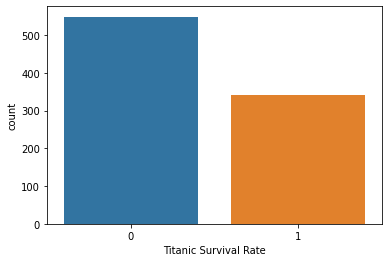

In [869]:
sns.countplot(x=data["Survived"])
plt.xlabel('Titanic Survival Rate');

**So, it's clear from the above plot that majority of the people onboarding the titanic did not survived.**

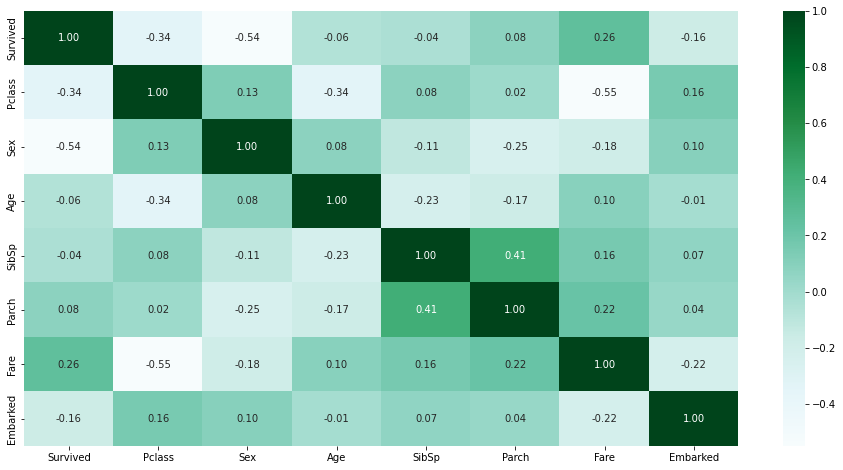

In [870]:
plt.figure(figsize= (16, 8))
sns.heatmap(data.corr(), annot = True, cmap= 'BuGn',fmt= '.2f');

In [871]:
x = data.drop("Survived", axis=1)                                  # making x and y variables for bulding the model
y = data["Survived"]

In [872]:
from sklearn.model_selection import train_test_split                                                   #importing train_test_split for traing the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#**LogisticRegression**

In [873]:
from sklearn.linear_model import LogisticRegression

model_1=LogisticRegression(max_iter=1000)
model_1.fit(x_train, y_train)
y_pred_1 = model_1.predict(x_test)

In [874]:
from sklearn.metrics import classification_report, accuracy_score

print('Accuracy Score:', round(accuracy_score(y_pred_1,y_test),3))
print("--"*30)
print(classification_report(y_pred,y_test))

Accuracy Score: 0.81
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       109
           1       0.74      0.79      0.76        70

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179



In [875]:
pred_submission_1 = model_1.predict(test)
df = pd.DataFrame({"PassengerId": test_ids.values,"Survived": pred_submission_1})
df.to_csv("submission_1.csv", index=False)

#**SVC**

In [876]:
from sklearn.svm import SVC

model_2=SVC()
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)

In [877]:
print('Accuracy Score:', round(accuracy_score(y_pred_2,y_test),3))
print("--"*30)
print(classification_report(y_pred_2,y_test))

Accuracy Score: 0.659
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.64      0.76       154
           1       0.26      0.76      0.38        25

    accuracy                           0.66       179
   macro avg       0.60      0.70      0.57       179
weighted avg       0.85      0.66      0.71       179



In [878]:
pred_submission_2 =  model_2.predict(test)
df = pd.DataFrame({"PassengerId": test_ids.values,"Survived": pred_submission_2})
df.to_csv("submission_2.csv", index=False)

#**Naive Bayes**

In [879]:
from sklearn.naive_bayes import GaussianNB

model_3=GaussianNB()
model_3.fit(x_train, y_train)
y_pred_3 = model_3.predict(x_test)

In [880]:
print('Accuracy Score:', round(accuracy_score(y_pred_3,y_test),3))
print("--"*30)
print(classification_report(y_pred_3,y_test))

Accuracy Score: 0.777
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        99
           1       0.77      0.71      0.74        80

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [881]:
pred_submission_3 =  model_3.predict(test)
df = pd.DataFrame({"PassengerId": test_ids.values,"Survived": pred_submission_3})
df.to_csv("submission_3.csv", index=False)